<a href="https://colab.research.google.com/github/Valeria379/Data-Science/blob/main/%D0%9C%D0%BE%D1%80%D0%BE%D0%B7%D0%BE%D0%B2%D0%B0_%D0%92_04_1_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Задание к лекции 04-1: Линейная регрессия 1

Name: Морозова Валерия

Email:Morozova-VA@mgpu.ru




## Упражнение: амфетамин и аппетит

Амфетамин – препарат, подавляющий аппетит. В исследовании этого эффекта фармаколог случайным образом распределил 24 крысы на три группы лечения, которым вводили инъекцию амфетамина в одной из двух дозировок (2,5 мг/кг или 5,0 мг/кг) или инъекцию физиологического раствора (0 мг). /кг). Он измерил количество пищи, потребляемой каждым животным (в г/кг) в течение 3-часового периода после инъекции. Результаты (граммы потребляемой пищи на кг массы тела) показаны ниже.


In [ ]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Experiment results:

food_consump_dose0 = [112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3]
food_consump_dose2p5 = [73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1]
food_consump_dose5 = [38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]

## Упражнение 4-1.1: Диаграмма рассеяния и линейная регрессия

**Упражнение:** Постройте диаграмму рассеяния, указав дозу в качестве переменной $x$ и потребление пищи в качестве переменной $y$. Затем запустите линейную регрессию данных, используя функцию `ols` из библиотеки `Python statsmodels`, чтобы связать переменные по

$$
\text{Потребление пищи} = \beta_0 + \beta_1 \text{Доза}.
$$

Какое получается линейное уравнение? Каково значение $R^2$? Считаете ли вы, что переменные имеют сильную линейную связь? Добавьте линию тренда к диаграмме рассеяния.

In [ ]:
#преобразуем исходный набор данных в датафрейм
df = pd.DataFrame({
    'Dose':[0,0,0,0,0,0,0,0, 2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5, 5,5,5,5,5,5,5,5],
    'Food_consump':[112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3, 73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1, 38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]
})
df

,Dose,Food_consump
0,0.0,112.6
1,0.0,102.1
2,0.0,90.2
3,0.0,81.5
4,0.0,105.6
5,0.0,93.0
6,0.0,106.6
7,0.0,108.3
8,2.5,73.3
9,2.5,84.8


In [ ]:
df.describe()

,Dose,Food_consump
count,24.000000,24.000000
mean,2.500000,76.812500
std,2.085144,21.842685
min,0.000000,38.500000
25%,0.000000,57.700000
50%,2.500000,78.900000
75%,5.000000,90.900000
max,5.000000,112.600000


Построим диаграмму рассеяния, указав дозу в качестве переменной  x  и потребление пищи в качестве переменной  y

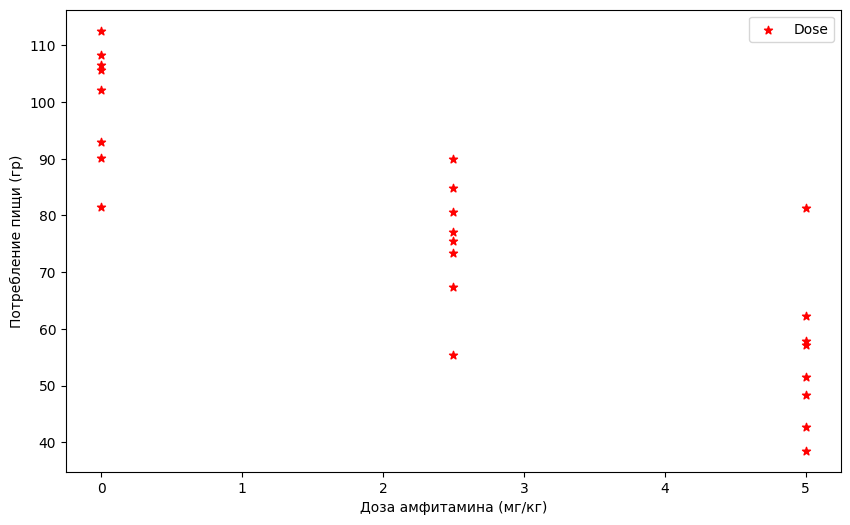

In [ ]:
plt.scatter(x=df['Dose'],y=df['Food_consump'],c='r',marker='*',label='Dose')


plt.legend()
plt.xlabel('Доза амфитамина (мг/кг)')
plt.ylabel('Потребление пищи (гр)')
plt.show()


Исходя из диаграммы рассеяния видно, что существует взаимосвязь между дозой амфитамина и количествои потребления пищи в последствии. Можно сделать вывод, что чем больше доза амфитамина была введена, тем меньше объем потребления пищи у подопытных.

In [ ]:
#запустим линейную регрессию данных, используя функцию ols из библиотеки Python statsmodels
Dose_ols = sm.ols(formula="Food_consump ~ Dose", data=df).fit()
Dose_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Food_consump   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     62.41
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           7.27e-08
Time:                        09:56:48   Log-Likelihood:                -91.420
No. Observations:                  24   AIC:                             186.8
Df Residuals:                      22   BIC:                             189.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.3313      3.680     26.994      0.000      91.700     106.963
Dose          -9.0075      1.140     -7.900      0.000     -11.372      -6.643
==============================================================================
Omnibus:                        0.409   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.052
Skew:                           0.114   Prob(JB):                        0.974
Kurtosis:                       3.012   Cond. No.                         5.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Ваш ответ:**

$\hat{\beta}_0 = 99.331$,

$\hat{\beta}_1 = -9.007$

**Уравнение получается**: Потребление пищи = 99.331 - 9.007 * Доза

$R^2$=73% это значит,что модель объясняет $73\%$ изменчивости потребления.

Значение $p$ как для $F$-статистики, так и для коэффициента крайне мало, что указывает на сильную линейную связь и подтверждает значимость модели.


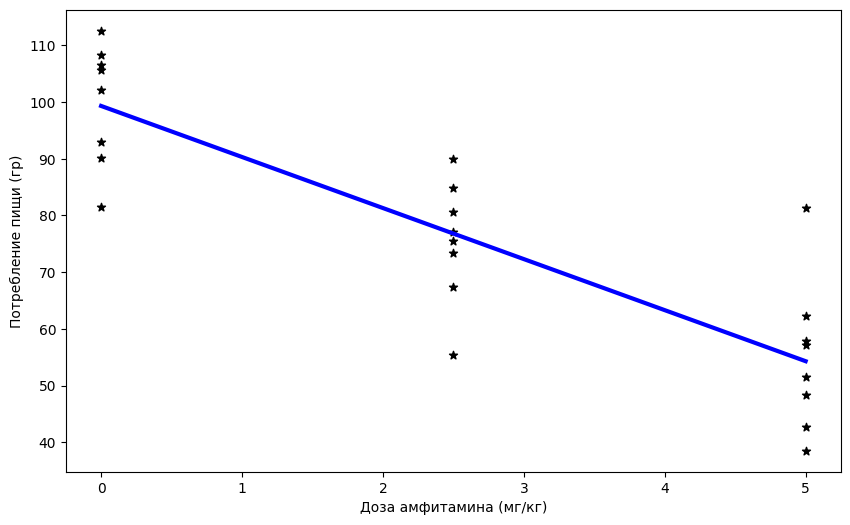

In [ ]:
#Добавим линию тренда к диаграмме рассеяния
plt.scatter(x=df['Dose'],y=df['Food_consump'],c='k',marker='*',label='Dose')
plt.plot(df['Dose'],Dose_ols.predict(),color='blue',linewidth=3)

plt.xlabel('Доза амфитамина (мг/кг)')
plt.ylabel('Потребление пищи (гр)')
plt.show()

## Задание 4-1.2: Невязка(остатки) значения

Регрессия в Упражнении 4-1.1 на самом деле валидна, даже несмотря на то, что предиктор $x$ имеет только 3 различных значения; для каждого фиксированного значения $x$ исследователь собрал случайную выборку значений $y$.

Однако одно предположение, которое делается с помощью простой линейной регрессии, заключается в том, что остатки имеют примерно нормальное распределение.

**Упражнение:** Вычислите остатки для приведенной выше регрессии и постройте нормальный вероятностный график остатков. Как вы думаете, они нормально распределены?



**Ваш ответ:**


In [ ]:
#Вычислим остатки для регрессии
residuals = Dose_ols.resid
residuals

0     13.26875
1      2.76875
2     -9.13125
3    -17.83125
4      6.26875
5     -6.33125
6      7.26875
7      8.96875
8     -3.51250
9      7.98750
10    -9.51250
11   -21.51250
12     3.88750
13    13.18750
14    -1.31250
15     0.28750
16   -15.79375
17    27.00625
18     2.80625
19     8.00625
20    -2.79375
21    -5.99375
22   -11.59375
23     3.60625
dtype: float64

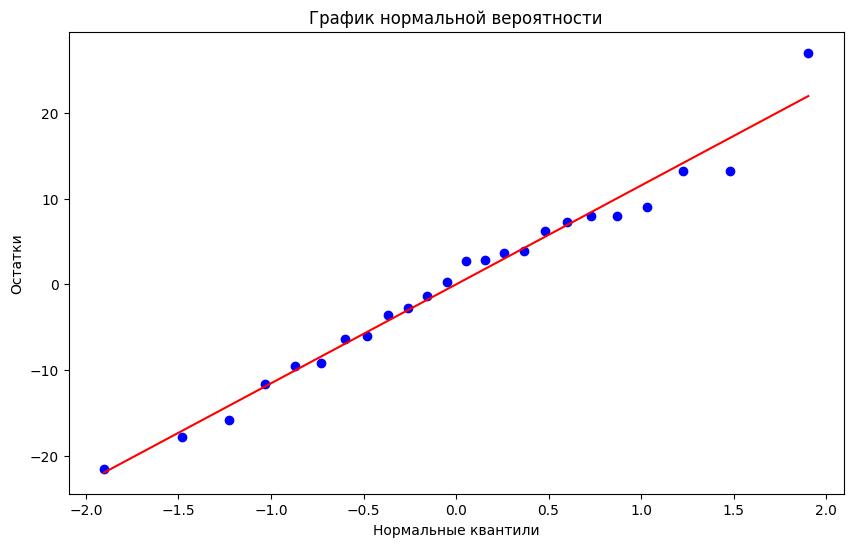

In [ ]:
#Построим нормальный вероятностный график остатков
from scipy.stats import norm
from scipy.stats import probplot

probplot(residuals, plot=plt)
plt.title("График нормальной вероятности")
plt.xlabel("Нормальные квантили")
plt.ylabel("Остатки")
plt.show()

Можно сказать, что остатки нормально распределены, так как большинство точек расположены относительно близко к линии.